Learn how to perform Exploratory Data Analysis for Natural Language Processing using WordCloud in Python.

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import zipfile
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with zipfile.ZipFile('winemag-data-130k-v2.csv.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [3]:
# Load in the dataframe
df = pd.read_csv("./winemag-data-130k-v2.csv", index_col=0)

In [4]:
# Looking at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Knowing the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [6]:
print("-There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("-There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))
print("-There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

-There are 129971 observations and 13 features in this dataset. 

-There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

-There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [7]:
pd.set_option('max_colwidth', 250)
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",87
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87


To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [8]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

**This selects the top 10 highest average points among all 44 countries:**

In [9]:
country.mean().sort_values(by='points', ascending=False).head(10)

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276
China,89.000000,18.000000
France,88.845109,41.139120
Luxembourg,88.666667,23.333333


**You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib.**

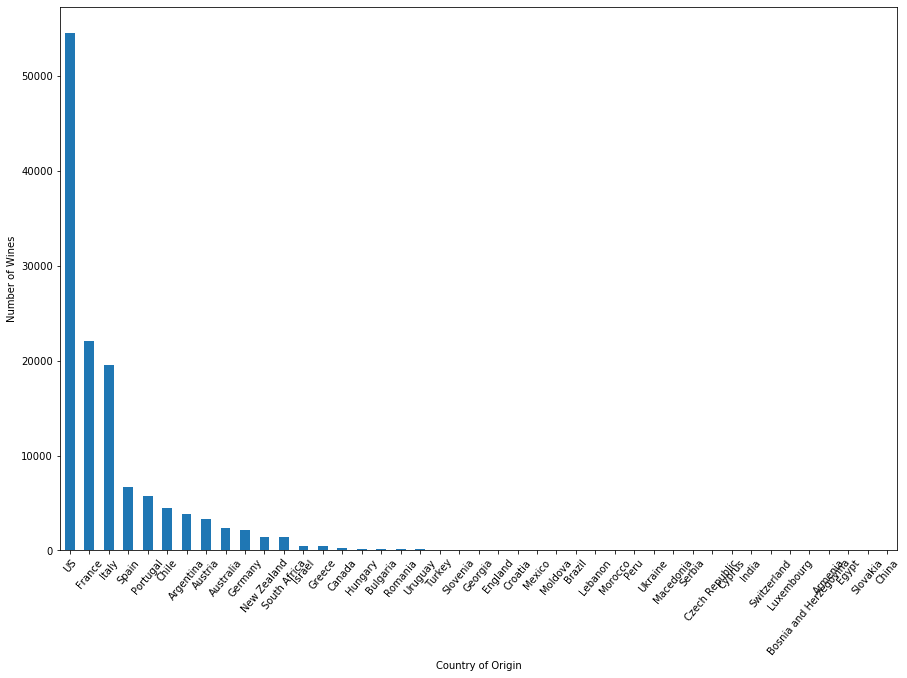

In [10]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Among 44 countries producing wine, US has more than 50,000 types of wine in the wine review dataset, twice as much as the next one in the rank: France - the country famous for its wine. Italy also produces a lot of quality wine, having nearly 20,000 wines open to review.

### Does quantity over quality?
Let's now take a look at the plot of all 44 countries by its highest rated wine, using the same plotting technique as above:

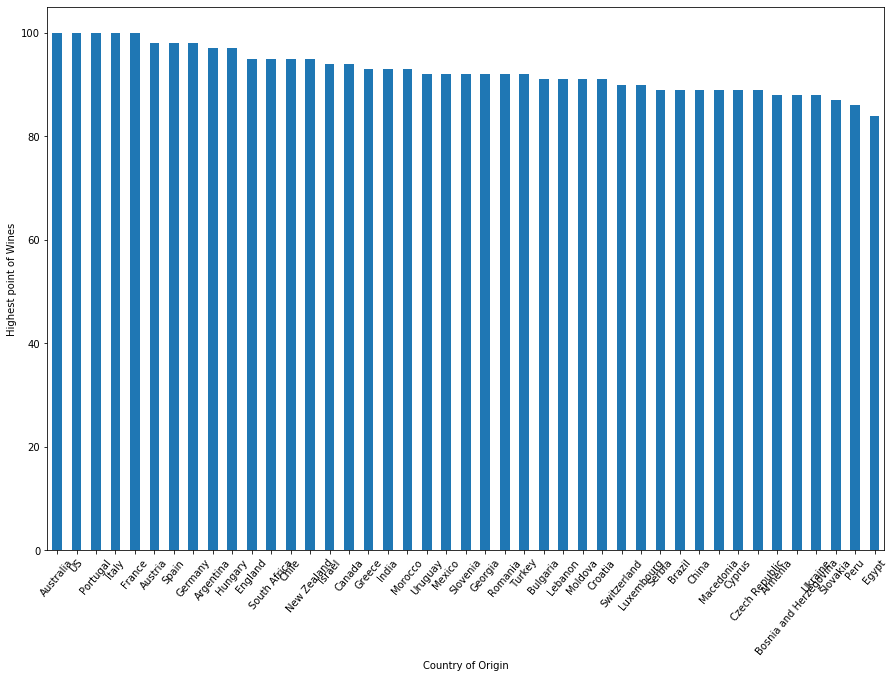

In [11]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

## Set up a basic WordCloud
let's start with a simple example: using the first observation description as the input for the wordcloud. The three steps are:

- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

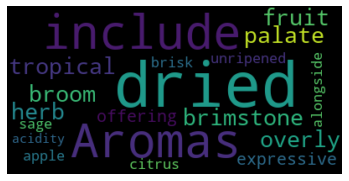

In [13]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

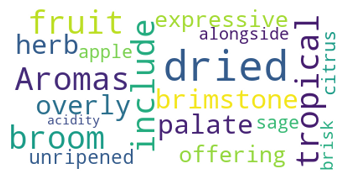

In [20]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="spline16")
plt.axis("off")
plt.show()

Ugh, it seems like max_font_size here might not be a good idea. It makes it more difficult to see the differences between word frequencies. However, brightening the background makes the cloud easier to read.

If you want to save the image, WordCloud provides a function to_file

In [16]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

You've probably noticed the argument `interpolation="bilinear"` in the `plt.imshow()`. This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [21]:
text = " ".join(review for review in df.description)
print ("There are {} letters in the combination of all review.".format(len(text)))

There are 31661073 letters in the combination of all review.


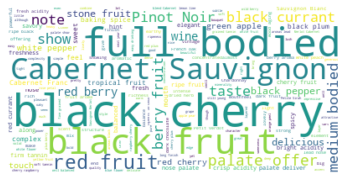

In [23]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like black cherry and full-bodied are the most mentioned characteristics, and Cabernet Sauvignon is the most popular of them all. This aligns with the fact that Cabernet Sauvignon "is one of the world's most widely recognized red wine grape varieties. It is grown in nearly every major wine producing country among a diverse spectrum of climates from Canada's Okanagan Valley to Lebanon's Beqaa Valley".[1]

Now, let's pour these words into a cup of wine!
Seriously,
Even a bottle of wine if you wish!

In order to create a shape for your wordcloud, first, you need to find a PNG file to become the mask. Below is a nice one that is available on the internet:

![title](img/wine_mask_xgk1tq.png)

In [24]:
%%html
<img src='img/wine_mask_xgk1tq.png',width=200,height=200>

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. To make sure that your mask works, let's take a look at it in the numpy array form:

In [25]:
wine_mask = np.array(Image.open("img/wine_mask_xgk1tq.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.

In [26]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [29]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine.

In [30]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

Okay! With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choice of color, you can take a look at this color code table

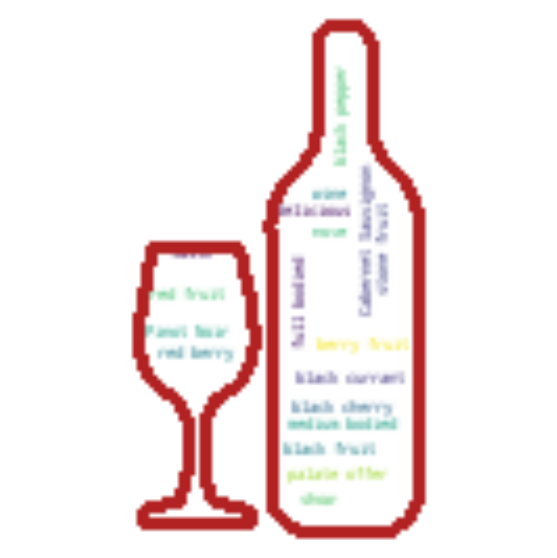

In [31]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()